<a href="https://colab.research.google.com/github/All4Nothing/pytorch-DL-programming/blob/main/Ch08_Mnist_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

In [5]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [2]:
# 파이토치 관련 라이브러리

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

In [3]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

# 08. MNIST를 활용한 숫자 인식

## 8.3 신경망과 딥러닝

2개 층 이상의 선형 함수로 이뤄진 모델이 딥러닝의 출발점

## 8.4 활성화 함수와 ReLU 함수

층이 깊은 신경망에 관해, 단지 선형 함수의 결과를 이어지는 은닉층으로 입력하는 것만으로는, 아무리 층이 깊을지라도, 하나의 층으로 이뤄진 모델과 수학적으로 차이가 없다.
층이 깊은 신경망이 유의미하기 위해서는 선형 함수를 통한 계산 결과에 '비선형 함수'로 불리는 함수를 적용시켜야 한다.

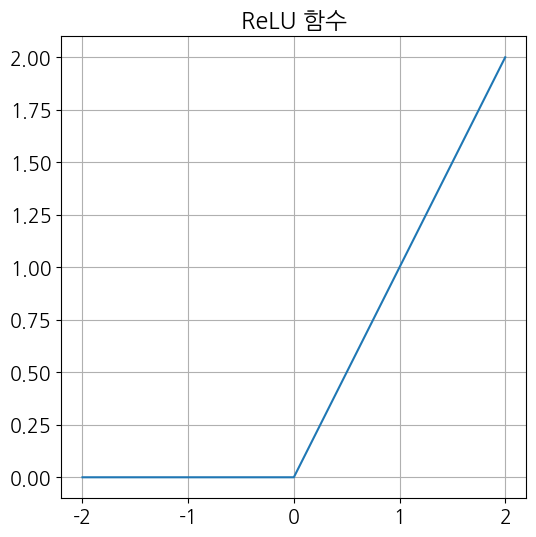

In [4]:
# ReLU 함수의 그래프

relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU 함수')
plt.show()

## 8.5 GPU 사용하기

런타임 - 런타임 유형 변경 - GPU

케라스의 경우, GPU 사용 여부는 시스템(프레임워크)이 체크해서 사용 가능하다면 프로그램을 의식하지 않고, 자동적으로 GPU를 사용한다.
파이토치는 프로그램에서 항상 GPU를 인식시켜줘야 한다.

### GPU 디바이스 확인

In [5]:
# 디바이스 할당
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### GPU 사용 규칙
1. 텐서 변수는 데이터가 CPU와 GPU 중 어디에 속해 있는지를 속성으로 갖는다.
2. CPU와 GPU 사이에서 데이터는 to 함수로 전송한다.
3. 두 개의 변수가 모두 GPU에 올라가 있는 경우, 연산은 GPU로 수행한다.
4. 두 변수 중 한쪽이 CPU, 다른 한쪽이 GPU에 올라가 있는 경우, 연산은 에러를 발생시킨다.

In [6]:
# 텐서 변수 x, y
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

# x와 y 사이의 연산
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])


In [7]:
# 변수 x를 GPU로 보냄
x = x.to(device)

# 변수 x와 y의 디바이스 속성 확인
print('x: ', x.device)
print('y: ', y.device)

x:  cuda:0
y:  cpu


In [8]:
# 이 상태에서 x와 y의 연산을 수행하면...

z = x * y

RuntimeError: ignored

In [9]:
# y도 GPU로 보냄
y = y.to(device)

# 연산이 가능해짐
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')


## 8.7 미니 배치 학습법

- 배치 학습법 : 원래의 학습 데이터 전체 건수로 한 번에 경사 계산을 하는 방식
- 미니 배치 학습법 : 사전에 합의된 건 수만큼 그룹을 만들어, 그룹 단위로 경사를 계산하는 방법
파이토치에서는 간단하게 미니 배치 학습법을 사용할 수 있도록 Data Loader 라는 장치가 있다.

## 8.8 데이터 준비 1 (Dataset을 활용해 불러오기)

학습용 데이터 준비를 위한 파이토치 도구들
- 데이터 입수 : Dataset
- 데이터 전처리 : Transforms
- 미니 배치용 데이터셋 생성 : DataLoader

### 데이터 입수

In [10]:
# 라이브러리 임포트
import torchvision.datasets as datasets

# 다운로드받을 디렉터리명
data_root = './data'

train_set0 = datasets.MNIST(
    # 원본 데이터를 다운로드받을 디렉터리 지정
    root = data_root,
    # 훈련 데이터인지 또는 검증 데이터인지
    train = True,
    # 원본 데이터가 없는 경우, 다운로드를 실행하는지 여부
    download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 115139788.93it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 114171247.71it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35989526.64it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21623755.70it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [11]:
# 다운로드한 파일 확인

!ls -lR ./data/MNIST

./data/MNIST:
total 4
drwxr-xr-x 2 root root 4096 Jun 19 14:35 raw

./data/MNIST/raw:
total 65008
-rw-r--r-- 1 root root  7840016 Jun 19 14:35 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Jun 19 14:35 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Jun 19 14:35 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Jun 19 14:35 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Jun 19 14:35 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Jun 19 14:35 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Jun 19 14:35 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Jun 19 14:35 train-labels-idx1-ubyte.gz


In [12]:
# 데이터 건수 확인
print('데이터 건수: ', len(train_set0))

# 첫번째 요소 가져오기
image, label = train_set0[0]

# 데이터 타입 확인
print('입력 데이터 타입 : ', type(image))
print('정답 데이터 타입 : ', type(label))

데이터 건수:  60000
입력 데이터 타입 :  <class 'PIL.Image.Image'>
정답 데이터 타입 :  <class 'int'>


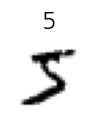

In [13]:
# 입력 데이터를 이미지로 출력

plt.figure(figsize=(1,1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

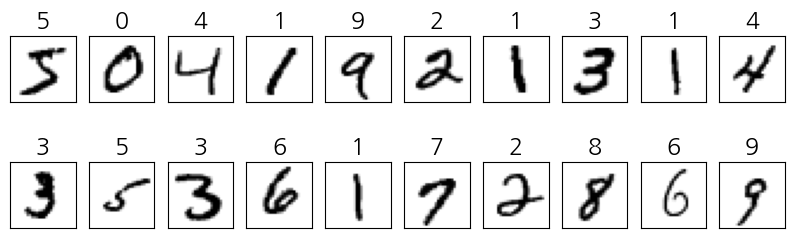

In [14]:
# 정답 데이터와 함께 처음 20개 데이터를 이미지로 출력

plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)

    # image와 label 취득
    image, label = train_set0[i]

    # 이미지 출력
    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

라이브러리로 준비된 dataset.MNIST 클래스의 인스턴스 변수인 train_set0가, 원본 데이터 파일을 감춘채 파이썬으로 사용하기 간편한리스트 형태의 인터페이스를 제공하고 있다.

## 8.9 데이터 준비 2 (Transforms를 활용한 데이터 전처리)

### 스텝 1. ToTensor 사용하기

In [17]:
# 라이브러리 임포트
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    # 데이터를 텐서로 변환
    # image 변수가 텐서 변수로 변환됨
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root=data_root,  train=True,  download=True,
    transform = transform1)

In [18]:
# 변환 결과 확인

image, label = train_set1[0]
print('입력 데이터 타입 : ', type(image))
print('입력 데이터 shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

입력 데이터 타입 :  <class 'torch.Tensor'>
입력 데이터 shape :  torch.Size([1, 28, 28])
최솟값 :  tensor(0.)
최댓값 :  tensor(1.)


### 스텝 2. Normalize 사용하기

Normalize 클래스를 사용해서 데이터를 정규화한다.
Normalize$(μ,σ)로 원본 데이터 𝒳 는 𝐗=(𝒳-μ)/σ에 따라 변환된다.

In [20]:
transform2 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),

    # 데이터 정규화
    transforms.Normalize(0.5,  0.5), # 범위 [0,1] -> [-1,1]
])

train_set2 = datasets.MNIST(
    root = data_root,  train = True,  download = True,
    transform = transform2)

In [21]:
# 변환 결과 확인

image, label = train_set2[0]
print('shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

shape :  torch.Size([1, 28, 28])
최솟값 :  tensor(-1.)
최댓값 :  tensor(1.)


### 스텝 3. Lambda 클래스를 사용해 1차원으로 텐서 변환하기

FCNN 신경망에 입력하기 위해, 입력 변수의 shape를 원본 [1, 28, 28]에서 [784]로 변경

In [23]:
transform3 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),

    # 데이터 정규화
    transforms.Normalize(0.5, 0.5),

    # 현재 텐서를 1계 텐서로 변환
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set3 = datasets.MNIST(
    root = data_root,  train = True,
    download=True, transform = transform3)

In [25]:
# 변환 결과 확인

image, label = train_set3[0]
print('shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

shape :  torch.Size([784])
최솟값 :  tensor(-1.)
최댓값 :  tensor(1.)


Transforms 최종 구현 형태

In [26]:
# 데이터 변환용 함수 Transforms
# (1) Image를 텐서화
# (2) [0, 1] 범위의 값을 [-1, 1] 범위로 조정
# (3) 데이터의 shape을 [1, 28, 28] 에서 [784] 로 변환

transform = transforms.Compose([
    # (1) 데이터를 텐서로 변환
    transforms.ToTensor(),

    # (2) 데이터 정규화
    transforms.Normalize(0.5, 0.5),

    # (3) 1계 텐서로 변환
    transforms.Lambda(lambda x: x.view(-1)),
])

In [27]:
# 데이터 입수를 위한 Dataset 함수

# 훈련용 데이터셋 정의
train_set = datasets.MNIST(
    root = data_root, train = True,
    download = True, transform = transform)

# 검증용 데이터셋 정의
test_set = datasets.MNIST(
    root = data_root, train = False,
    download = True, transform = transform)

## 8.10 데이터 준비 3 (데이터로더를 활용한 미니 배치 데이터 생성

In [29]:
# 라이브러리 임포트
from torch.utils.data import DataLoader

# 미니 배치 사이즈 지정
## batch_size : 미니 배치 처리 한 번당 얼마나 많은 분량의 데이터를 취할 것인가
batch_size = 500

# 훈련용 데이터로더
# 훈련용이므로, 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size,
    shuffle = True)

# 검증용 데이터로더
# 검증시에는 셔플을 필요로하지 않음
## shuffle : 난수로 데이터를 섞을지 여부
test_loader = DataLoader(
    test_set,  batch_size = batch_size,
    shuffle = False)

In [31]:
# 몇 개의 그룹으로 데이터를 가져올 수 있는가
print(len(train_loader)) # == 60000/500

# 데이터로더로부터 가장 처음 한 세트를 가져옴
for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


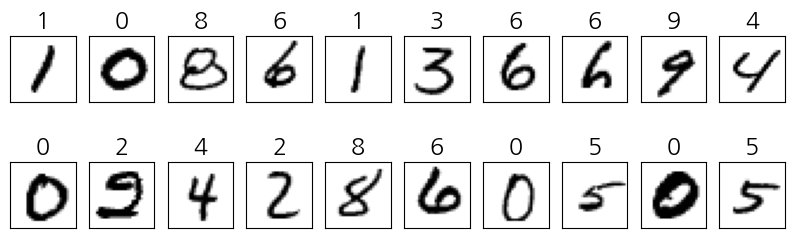

In [32]:
# 이미지 출력
plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)

    # 넘파이로 배열로 변환
    image = images[i].numpy()
    label = labels[i]

    # 이미지의 범위를 [0, 1] 로 되돌림
    image2 = (image + 1)/ 2

    # 이미지 출력
    plt.imshow(image2.reshape(28, 28),cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 8.11 모델 정의

In [36]:
# 입력 차원수
n_input = image.shape[0]

# 출력 차원수
# 분류 클래스 수는 10
n_output = len(list(set(labels.data.numpy())))

# 은닉층의 노드 수
n_hidden = 128

# 결과 확인
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

n_input: 784  n_hidden: 128 n_output: 10


In [37]:
# 모델 정의
# 784입력 10출력 1은닉층의 신경망 모델

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 은닉층 정의(은닉층 노드 수 : n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 출력층 정의
        self.l2 = nn.Linear(n_hidden, n_output)

        # ReLU 함수 정의
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

두번째(출력층) 선형 함수의 출력에 대해서 활성화 함수가 없는 것은, 손실 함수 쪽에 소프트맥스 함수를 포함할 예정이기 때문

지금까지의 구현과 달리, 파라미터의 초깃값을 모두 1.0으로 설정했던 부분이 없다.
모든 요소의 값을 1.0으로 설정하면, 모델의 파라미터 수가 방대한 탓에 학습이 잘 이뤄지지 않는다.
따라서, 난수를 사용한 가장 적합한 초깃값 설정을 그대로 사용하는 방침을 취한 것

In [38]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 인스턴스 생성
net = Net(n_input, n_output, n_hidden)

# 모델을 GPU로 전송
net = net.to(device)

### 최적화 알고리즘과 손실 함수

In [39]:
# 학습률
lr = 0.01

# 최적화 알고리즘: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

### 모델 확인


In [40]:
# 모델 내부 파라미터 확인
# l1.weight, l1.bias, l2.weight, l2.bias를 확인할 수 있음

for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0277,  0.0200,  0.0315],
        [ 0.0184, -0.0322,  0.0175,  ...,  0.0089, -0.0028, -0.0033],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0322, -0.0059, -0.0169],
        [-0.0328, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       device='cuda:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.0325, -0.0298,  0.0013,  0.0199,  0.0268, -0.0248, -0.0172, -0.0355,
         0.0122, -0.0048,  0.0214,  0.0202, -0.0243,  0.0015, -0.0276,  0.0296,
         0.0341, -0.0228,  0.0230,  0.0347, -0.0091, -0.0346,  0.0206, -0.0060,
         0.0329,  0.0047,  0.0180,  0.0101,  0.0177, -0.0309,  0.0228, -0.0224,
         0.0321,  0.0179,  0.0321,  0.0184,  0.0219, -0.0089,  0.0310, -0.0039,
        -0.0074, -0.0317,  0.0192, -0.0021,  0.0190

In [41]:
# 모델 개요 표시 1

print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [42]:
# 모델 개요 표시 2

summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [10]                      --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [10]                      1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 12.87
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.41
Estimated Total Size (MB): 0.41

## 8.12 경사 하강법

### 예측 계산

In [43]:
# 훈련 데이터셋의 가장 처음 항목을 취득
# 데이터로더에서 가장 처음 항목을 취득
for images, labels in train_loader:
    break

In [45]:
# 데이터로더에서 취득한 데이터를 GPU로 보냄
inputs = images.to(device)
labels = labels.to(device)

In [46]:
# 예측 계산
outputs = net(inputs)

# 결과 확인
print(outputs)

tensor([[-0.3622, -0.1927, -0.0179,  ...,  0.1073,  0.1025, -0.0615],
        [-0.4072, -0.1814,  0.0716,  ...,  0.1866,  0.1975,  0.1161],
        [-0.3221, -0.0547, -0.2868,  ...,  0.1967, -0.0103,  0.1591],
        ...,
        [-0.2091, -0.1058,  0.2365,  ...,  0.1360,  0.0665,  0.0987],
        [-0.2756, -0.2012,  0.1703,  ...,  0.1223,  0.2388,  0.0233],
        [-0.3045, -0.2458,  0.1416,  ...,  0.1012,  0.0820, -0.1457]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


### 손실 계산

2.3328874111175537


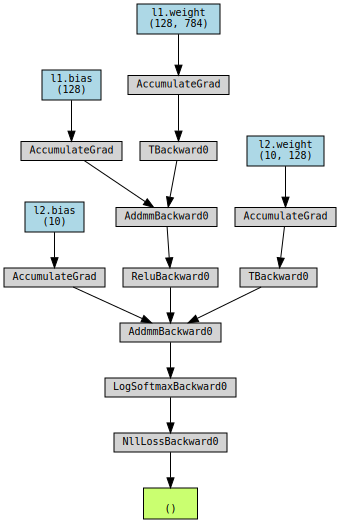

In [47]:
#  손실 계산
loss = criterion(outputs, labels)

# 손실값 가져오기
print(loss.item())

# 손실 계산 그래프 시각화
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

weight와 bias가 두개인 것은, 선형 함수를 모델에 두 개 사용한 것(=은닉층이 포함한 모델을 작성했음)을 의미

### 경사 계산

In [48]:
# 경사 계산 실행
loss.backward()

In [49]:
# 경사 계산 결과
w = net.to('cpu')
print(w.l1.weight.grad.numpy())
print(w.l1.bias.grad.numpy())
print(w.l2.weight.grad.numpy())
print(w.l2.bias.grad.numpy())

[[-0.0007 -0.0007 -0.0007 ... -0.0007 -0.0007 -0.0007]
 [ 0.0077  0.0077  0.0077 ...  0.0077  0.0077  0.0077]
 [-0.0018 -0.0018 -0.0018 ... -0.0018 -0.0018 -0.0018]
 ...
 [-0.0008 -0.0008 -0.0008 ... -0.0008 -0.0008 -0.0008]
 [ 0.0011  0.0011  0.0011 ...  0.0011  0.0011  0.0011]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]]
[ 0.0007 -0.0077  0.0018  0.0008 -0.      0.      0.0014 -0.0008  0.0025
 -0.0016  0.0009 -0.002   0.0006  0.0025 -0.0026  0.0008  0.0061 -0.0011
 -0.0018  0.008   0.0063  0.0026 -0.0036  0.0056 -0.0006 -0.0038  0.0034
  0.     -0.0026 -0.0032 -0.0006  0.0034  0.0018  0.      0.0001  0.0002
  0.0047 -0.0012  0.0022  0.0018  0.0037 -0.0061  0.0011  0.0097 -0.0017
 -0.0012 -0.0004 -0.001  -0.0031 -0.0003 -0.0008  0.0004  0.0001 -0.0016
 -0.002  -0.0001 -0.0006 -0.0024 -0.0004  0.0029  0.0013 -0.0085  0.0013
  0.0015  0.     -0.0006  0.004  -0.0016 -0.0052  0.0003 -0.0031  0.0001
  0.0009 -0.0017 -0.0069 -0.0028  0.0017 -0.003   0.0012  0.0024  0.0011
 -0.002

### 파라미터 수정

In [50]:
# 경사 하강법 적용
optimizer.step()

In [51]:
# 파라미터 값 출력
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0278,  0.0200,  0.0316],
        [ 0.0183, -0.0322,  0.0174,  ...,  0.0088, -0.0029, -0.0034],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0323, -0.0059, -0.0169],
        [-0.0329, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       requires_grad=True)
Parameter containing:
tensor([ 3.2475e-02, -2.9682e-02,  1.2742e-03,  1.9874e-02,  2.6836e-02,
        -2.4759e-02, -1.7201e-02, -3.5517e-02,  1.2199e-02, -4.7449e-03,
         2.1379e-02,  2.0187e-02, -2.4297e-02,  1.4928e-03, -2.7613e-02,
         2.9618e-02,  3.4051e-02, -2.2777e-02,  2.2983e-02,  3.4580e-02,
        -9.1870e-03, -3.4619e-02,  2.0599e-02, -6.0632e-03,  3.2937e-02,
         4.7784e-03,  1.7949e-02,  1.0102e-02,  1.7700e-02, -3.0853e-02,
         2.2817e-02, -2.2391e-02,  3.2049e-02,  1.7890e-0

### 반복 계산

In [55]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 10

# 평가 결과 기록
history = np.zeros((0,5))

In [56]:
# tqdm 라이브러리 임포트
from tqdm.notebook import tqdm

# 반복 계산 메인 루프
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # 훈련 페이즈
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPU로 전송
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 경사 초기화
        optimizer.zero_grad()

        # 예측 계산
        outputs = net(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 경사 계산
        loss.backward()

        # 파라미터 수정
        optimizer.step()

        # 예측 라벨 산출
        predicted = torch.max(outputs, 1)[1]

        # 손실과 정확도 계산
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    # 예측 페이즈
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)


        # 예측 계산
        outputs_test = net(inputs_test)

        # 손실 계산
        loss_test = criterion(outputs_test, labels_test)

        # 예측 라벨 산출
        predicted_test = torch.max(outputs_test, 1)[1]

        # 손실과 정확도 계산
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # 평가 결과 산출, 기록
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/10], loss: 1.82932 acc: 0.56958 val_loss: 1.32629, val_acc: 0.74660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/10], loss: 1.03888 acc: 0.79537 val_loss: 0.79661, val_acc: 0.83180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.70809 acc: 0.84110 val_loss: 0.60256, val_acc: 0.85850


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.57300 acc: 0.86057 val_loss: 0.51192, val_acc: 0.87140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.50223 acc: 0.87102 val_loss: 0.45827, val_acc: 0.87920


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.45883 acc: 0.87878 val_loss: 0.42422, val_acc: 0.88650


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.42938 acc: 0.88327 val_loss: 0.40076, val_acc: 0.88970


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.40813 acc: 0.88743 val_loss: 0.38285, val_acc: 0.89370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.39176 acc: 0.89065 val_loss: 0.36857, val_acc: 0.89680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.37876 acc: 0.89313 val_loss: 0.35741, val_acc: 0.89930


이전 코드들과 달리, 미니 배치 처리에서는 2중 반복 루프를 구현하고 있다.
또한, 미니 배치 처리를 위한 루프가 돌 때마다 tqdm 함수를 거쳐, 프로그레스 바가 출력된다.

## 8.13 결과 확인

In [57]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

초기상태 : 손실 : 1.32629  정확도 : 0.74660
최종상태 : 손실 : 0.35741  정확도 : 0.89930


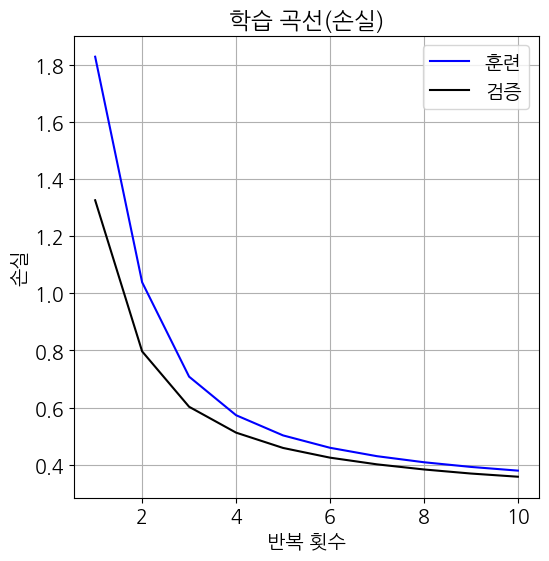

In [58]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b', label='훈련')
plt.plot(history[:,0], history[:,3], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.legend()
plt.show()

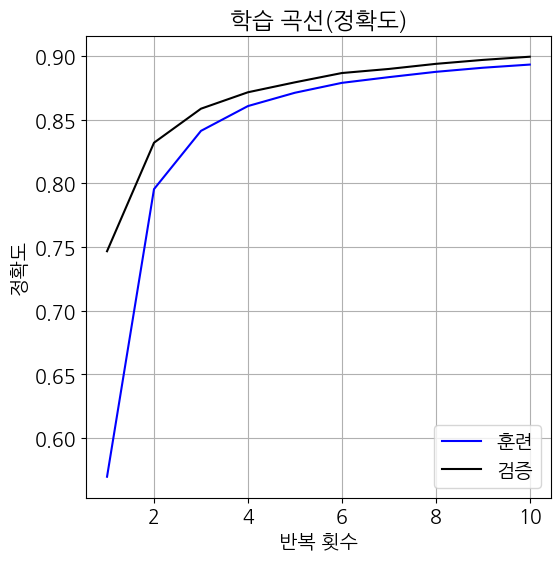

In [59]:
# 학습 곡선 출력(정확도)

plt.plot(history[:,0], history[:,2], 'b', label='훈련')
plt.plot(history[:,0], history[:,4], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('정확도')
plt.title('학습 곡선(정확도)')
plt.legend()
plt.show()

### 이미지 출력 확인

In [60]:
# 데이터로더에서 처음 한 세트 가져오기
for images, labels in test_loader:
    break

# 예측 결과 가져오기
inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]

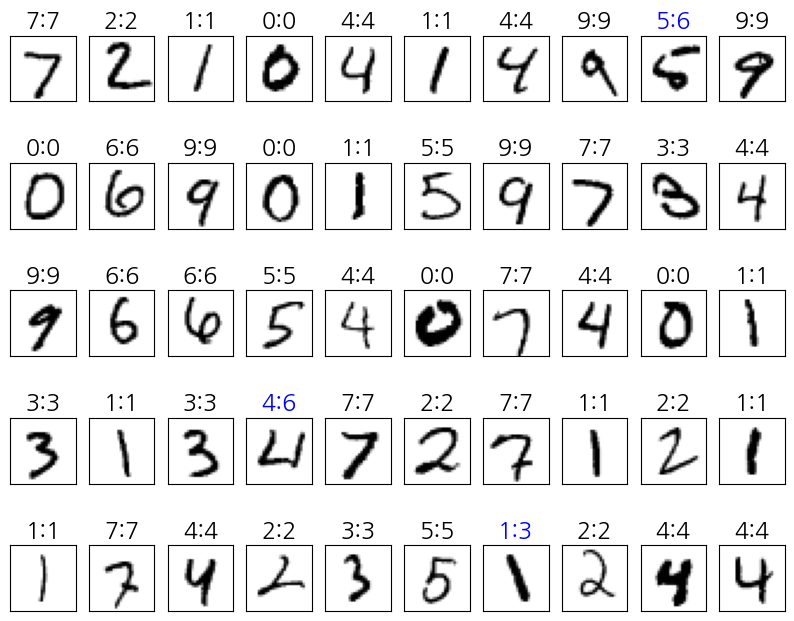

In [61]:
# 처음 50건의 이미지에 대해 "정답:예측"으로 출력

plt.figure(figsize=(10, 8))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)

  # 넘파이 배열로 변환
  image = images[i]
  label = labels[i]
  pred = predicted[i]
  if (pred == label):
    c = 'k'
  else:
    c = 'b'

  # 이미지의 범위를 [0, 1] 로 되돌림
  image2 = (image + 1)/ 2

  # 이미지 출력
  plt.imshow(image2.reshape(28, 28),cmap='gray_r')
  ax.set_title(f'{label}:{pred}', c=c)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## 8.14 은닉층 추가하기

In [62]:
# 모델 정의
# 784입력 10출력을 갖는 2개의 은닉층을 포함한 신경망

class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 첫번째 은닉층 정의(은닉층 노드 수: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 두번째 은닉층 정의(은닉층 노드 수: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # 출력층 정의
        self.l3 = nn.Linear(n_hidden, n_output)

        # ReLU 함수 정의
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [63]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 초기화
net = Net2(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [64]:
# 모델 개요 표시 1

print(net)

Net2(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [65]:
# 모델 개요 표시 2

summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net2                                     [10]                      --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [128]                     16,512
├─ReLU: 1-4                              [128]                     --
├─Linear: 1-5                            [10]                      1,290
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
Total mult-adds (M): 14.99
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.47
Estimated Total Size (MB): 0.48

In [66]:
# 데이터로더에서 처음 한 세트 가져오기
for images, labels in test_loader:
    break

# 예측 결과 가져오기
inputs = images.to(device)
labels = labels.to(device)

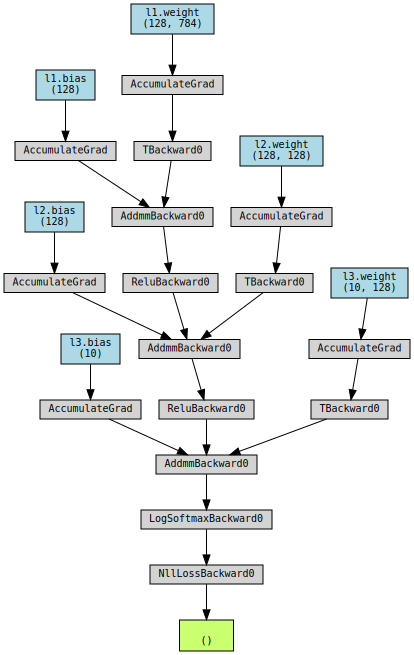

In [67]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels)

# 손실 계산 그래프 시각화
make_dot(loss, params=dict(net.named_parameters()))

### 경사 계산

In [68]:
# 경사 계산
loss.backward()

# 경사 계산 결과 일부
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# 각 요소의 절댓값 평균
print(np.abs(w).mean())

[[-0.0007 -0.0007 -0.0007 ... -0.0007 -0.0007 -0.0007]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]
 [-0.0005 -0.0005 -0.0005 ... -0.0005 -0.0005 -0.0005]
 ...
 [ 0.0015  0.0015  0.0015 ...  0.0015  0.0015  0.0015]
 [ 0.0002  0.0002  0.0002 ...  0.0002  0.0002  0.0002]
 [ 0.0003  0.0003  0.0003 ...  0.0003  0.0003  0.0003]]
0.0008487979


### 반복 계산

In [71]:
# 난수 고정
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True


# 모델 초기화
net = Net2(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 10

# 평가 결과 기록
history2 = np.zeros((0,5))

In [72]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    train_acc = 0
    train_loss = 0
    val_acc = 0
    val_loss = 0
    n_train = 0
    n_test = 0

    # 훈련 페이즈
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPU로 전송
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 경사 초기화
        optimizer.zero_grad()

        # 예측 계산
        outputs = net(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 경사 계산
        loss.backward()

        # 파라미터 수정
        optimizer.step()

        # 예측 라벨 산출
        predicted = torch.max(outputs, 1)[1]

        # 손실과 정확도 계산
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    # 예측 페이즈
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        # 예측 계산
        outputs_test = net(inputs_test)

        # 손실 계산
        loss_test = criterion(outputs_test, labels_test)

        # 예측 라벨 산출
        predicted_test = torch.max(outputs_test, 1)[1]

        # 손실과 정확도 계산
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # 평가 결과 산출, 기록
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history2 = np.vstack((history2, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/10], loss: 2.20163 acc: 0.25380 val_loss: 2.04576, val_acc: 0.49800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/10], loss: 1.75820 acc: 0.60443 val_loss: 1.39272, val_acc: 0.68680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/10], loss: 1.11284 acc: 0.75645 val_loss: 0.86510, val_acc: 0.80810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.75170 acc: 0.82300 val_loss: 0.63477, val_acc: 0.84380


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.59030 acc: 0.84983 val_loss: 0.52462, val_acc: 0.86370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.50672 acc: 0.86653 val_loss: 0.46400, val_acc: 0.87440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.45680 acc: 0.87540 val_loss: 0.42148, val_acc: 0.88560


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.42335 acc: 0.88195 val_loss: 0.39551, val_acc: 0.89020


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.39965 acc: 0.88768 val_loss: 0.37600, val_acc: 0.89350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.38195 acc: 0.89183 val_loss: 0.35886, val_acc: 0.89880


In [73]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history2[0,3]:.5f}  정확도 : {history2[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history2[-1,3]:.5f}  정확도 : {history2[-1,4]:.5f}' )

초기상태 : 손실 : 2.04576  정확도 : 0.49800
최종상태 : 손실 : 0.35886  정확도 : 0.89880


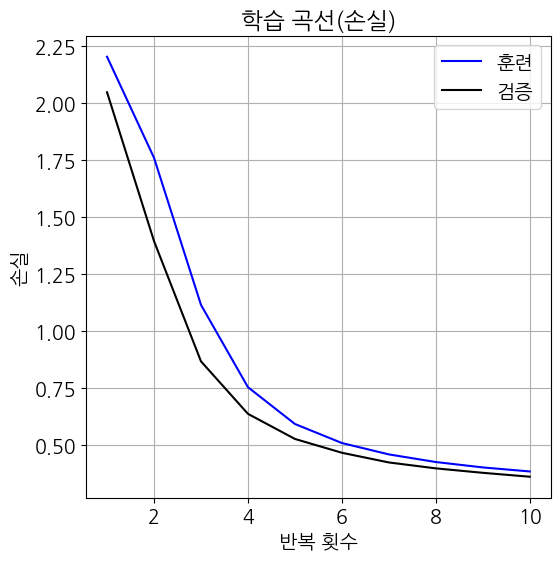

In [74]:
# 학습 곡선 출력(손실)
plt.plot(history2[:,0], history2[:,1], 'b', label='훈련')
plt.plot(history2[:,0], history2[:,3], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.legend()
plt.show()

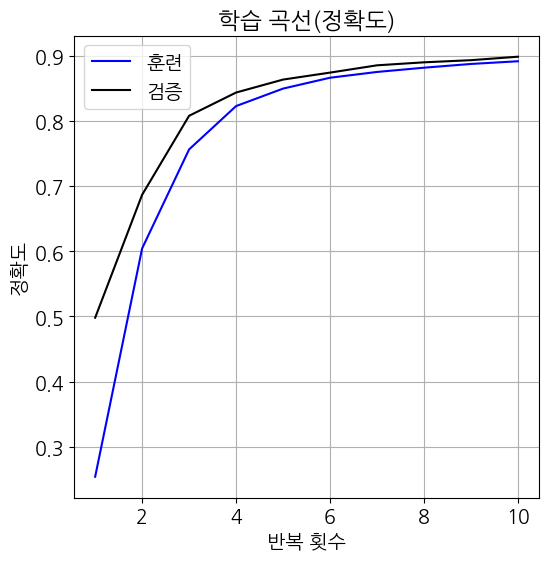

In [75]:
# 학습 곡선 출력(정확도)

plt.plot(history2[:,0], history2[:,2], 'b', label='훈련')
plt.plot(history2[:,0], history2[:,4], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('정확도')
plt.title('학습 곡선(정확도)')
plt.legend()
plt.show()

### 칼럼 경사 손실과 ReLU 함수

In [76]:
# 모델 정의 -　시그모이드 함수 버전
# 784입력 10출력을 갖는 2개의 은닉층을 포함한 신경망

class Net3(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 첫번째 은닉층 정의(은닉층 노드 수: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 두번째 은닉층 정의(은닉층 노드 수: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # 출력층 정의
        self.l3 = nn.Linear(n_hidden, n_output)

        # 시그모이드 함수 정의
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.sigmoid(x1)
        x3 = self.l2(x2)
        x4 = self.sigmoid(x3)
        x5 = self.l3(x4)
        return x5

In [77]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 초기화
net = Net3(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [78]:
# 데이터로더에서 처음 한 세트 가져오기
for images, labels in test_loader:
    break

# 예측 결과 가져오기
inputs = images.to(device)
labels = labels.to(device)

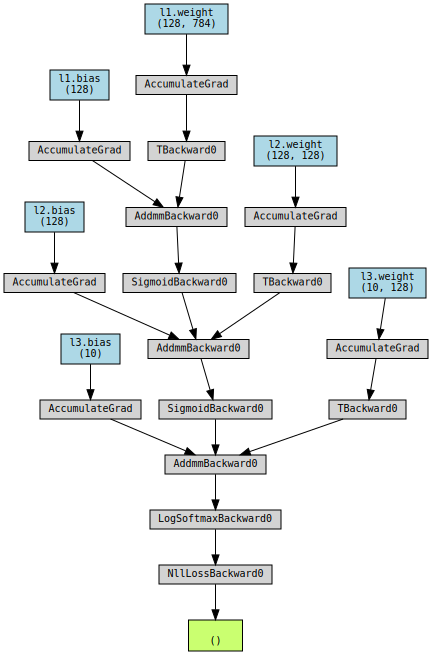

In [79]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels)

# 손실 계산 그래프 시각화
make_dot(loss, params=dict(net.named_parameters()))

In [80]:
# 경사 계산
loss.backward()

# 경사 계산 결과의 일부
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# 각 요소의 절댓값 평균
print(np.abs(w).mean())

[[ 0.0001  0.0001  0.0001 ...  0.0001  0.0001  0.0001]
 [ 0.0001  0.0001  0.0001 ...  0.0001  0.0001  0.0001]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]
 ...
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]
 [ 0.0002  0.0002  0.0002 ...  0.0002  0.0002  0.0002]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]]
0.00017514593


**딥러닝에서의 경사 손실**
ReLU 함수의 경우 l1.weight의 각 요소의 절댓값 평균을 계산한 결과 0.000848이었고, 이에 반해 시그모이드 함수의 경우, 0.000175로 상당히 작은 값을 얻었다.
은닉층이 두꺼워질 수록 이 차이는 커진다. 복잡한 합성 함수의 경사 값은 도중의 함수의 미분 결과를 전부 곱한 것이 된다.
그런데 시그모이드 함수의 경우, 입력 값이 0으로부터 멀리 떨어질수록 기울기(=경사값)는 0에 가까워진다. 합성 함수 내부에서 시그모이드 함수를 여러번 거치게 되면, 값은 점차 0으로 수렴해간다.
학습은 경사 값을 기반으로 이뤄지는 처리이므로, 경사 값이 0에 가까워진 경우, 학습은 극한으로 어려워지게 된다.
ReLU 함수는 입력값이 +이기만 하면, x값에 상관없이 경사 값은 항상 일정하다. 즉, 경사 소실이 일어나기 힘들다.

### 칼럼 람다 표현식을 활용한 함수 정의

In [81]:
# 일반적인 함수의 정의

def f(x):
    return (2 * x**2 + 2)

In [82]:
x = np.arange(-2, 2.1, 0.25)
y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


In [83]:
# 람다 표현식으로 함수 정의

g = lambda x: 2 * x**2 + 2

In [84]:
y = g(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


Lamda 클래스를 호출함과 동시에 함수의 정의가 가능하다.
함수를 따로 정의하고, 호출할 필요가 없다

### 칼럼 배치 사이즈와 정확도의 관계

배치 사이즈를 작게 하면 정확도가 향상된다.
미니 배치 학습법에서 배치 사이즈는 매우 중요한 튜닝 파라미터이다.